### Import Data and Required Packages

#### Importing Libraries

In [1]:

import numpy as np    ##  for mathematical Calculation
import pandas as pd   ## for data analysis and manipulation
import seaborn as sns   ## # For data visualization
import matplotlib.pyplot as plt  ## for Plotting Graphs
import warnings   
warnings.filterwarnings('ignore')      ## To ignore any warnings which shows at running time

#### Import the CSV  Data as Pandas Dataframe

In [2]:
data = pd.read_csv('data/Raw_Housing_Prices.csv')

#### Show Top 5 Records

In [3]:
data.head(5)

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,...,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,7129300520,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,No,NaN,...,7,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650
1,6414100192,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,No,NaN,...,7,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639
2,5631500400,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,No,NaN,...,6,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062
3,2487200875,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,No,NaN,...,7,1050.0,910,53,0,98136.0,47.5208,-122.393,1360.0,5000
4,1954400510,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,No,NaN,...,8,1680.0,0,31,0,98074.0,47.6168,-122.045,1800.0,7503


#### Shape of the dataset

In [4]:
data.shape

(21613, 21)

#### Understanding the Data

In [5]:
data.columns

Index(['ID', 'Date House was Sold', 'Sale Price', 'No of Bedrooms',
       'No of Bathrooms', 'Flat Area (in Sqft)', 'Lot Area (in Sqft)',
       'No of Floors', 'Waterfront View', 'No of Times Visited',
       'Condition of the House', 'Overall Grade',
       'Area of the House from Basement (in Sqft)', 'Basement Area (in Sqft)',
       'Age of House (in Years)', 'Renovated Year', 'Zipcode', 'Latitude',
       'Longitude', 'Living Area after Renovation (in Sqft)',
       'Lot Area after Renovation (in Sqft)'],
      dtype='object')

#### Dataset Information

- ID: Unique identifier for the house (eg. 6414100192)
- Date House was Sold: Sale date (eg. 14 December 2017)
- Sale Price: Selling Price of Houses (eg. 538000.0)
- No of Bedrooms/Bathrooms: Number of bedrooms and bathrooms
- Flat Area(Sqft): Living space area
- Lot Area(Sqft): Total lot area
- No of Floors: Number of floors
- Waterfront View: Whether it has a waterfront view -> (No/Yes)
- No of Times Visited: Visits before purchase
- Overall Grade: Quality rating. Here gave out of 10
- House Area (Basement): Total and basement area in sqft
- House Age: Age of the house
- Renovation Year: Year last renovated
- Zipcode: Location code
- Latitude/Longitude: Geographic coordinates
- Living/Lot Area after Renovation: Updated dimensions post-renovation

#### Check Missing Values

In [6]:
data.isna().sum()

ID                                               0
Date House was Sold                              0
Sale Price                                       4
No of Bedrooms                                   0
No of Bathrooms                                  4
Flat Area (in Sqft)                              9
Lot Area (in Sqft)                               9
No of Floors                                     0
Waterfront View                                  0
No of Times Visited                          19489
Condition of the House                           0
Overall Grade                                    0
Area of the House from Basement (in Sqft)        3
Basement Area (in Sqft)                          0
Age of House (in Years)                          0
Renovated Year                                   0
Zipcode                                          1
Latitude                                         1
Longitude                                        1
Living Area after Renovation (i

* There are __missing values__ in Sale Price, No of Bathrooms, Flat Area (in Sqft), Lot Area (in Sqft), Area of the House from Basement (in Sqft), Zipcode, Latitude, Longitude and Living Area after Renovation (in Sqft) features.
* For __numerical variables__: imputation using __mean__ or __median__
* For __categorical variables__: imputation using __mode__

#### Treating the Missing Values

In [ ]:
# Removing the missing values present in target varible in this case:
data.dropna(subset = 'Sale Price', inplace=True, axis = 0)
data['Sale Price'].isnull().sum()

0

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21609 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21609 non-null  int64  
 1   Date House was Sold                        21609 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21609 non-null  int64  
 4   No of Bathrooms                            21605 non-null  float64
 5   Flat Area (in Sqft)                        21600 non-null  float64
 6   Lot Area (in Sqft)                         21600 non-null  float64
 7   No of Floors                               21609 non-null  float64
 8   Waterfront View                            21609 non-null  object 
 9   No of Times Visited                        2124 non-null   object 
 10  Condition of the House     

* We can see clearly that the length of data is reduced to __21609__

In [9]:
#isolating numerical variables
numerical_columns = ['No of Bathrooms', 'Flat Area (in Sqft)','Lot Area (in Sqft)',
                     'Area of the House from Basement (in Sqft)','Latitude',
                     'Longitude','Living Area after Renovation (in Sqft)']

In [10]:
#imputing missing values
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan, strategy = 'median')
data[numerical_columns] = imputer.fit_transform(data[numerical_columns])

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21609 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21609 non-null  int64  
 1   Date House was Sold                        21609 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21609 non-null  int64  
 4   No of Bathrooms                            21609 non-null  float64
 5   Flat Area (in Sqft)                        21609 non-null  float64
 6   Lot Area (in Sqft)                         21609 non-null  float64
 7   No of Floors                               21609 non-null  float64
 8   Waterfront View                            21609 non-null  object 
 9   No of Times Visited                        2124 non-null   object 
 10  Condition of the House     

* Still remaining missing values in __No of Times Visited__ and __Zipcode__ 

##### Treating missing values with Zipcode and No of Times Visited

In [12]:
data['Zipcode'].shape

(21609,)

* It can be inferred that Zipcode is in __1D__

In [13]:
column = data["Zipcode"].values.reshape(-1,1)
column.shape

(21609, 1)

* Now, It is __2D__ by using the reshape() function.

In [14]:
# Imputing the missing values by mode/most_frequent
imputer = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')
data['Zipcode'] = imputer.fit_transform(column)

In [15]:
data.drop(columns = 'No of Times Visited', inplace = True)

- There are a lot of missing values present in 'No of Times Visited' so drop this column.

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21609 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21609 non-null  int64  
 1   Date House was Sold                        21609 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21609 non-null  int64  
 4   No of Bathrooms                            21609 non-null  float64
 5   Flat Area (in Sqft)                        21609 non-null  float64
 6   Lot Area (in Sqft)                         21609 non-null  float64
 7   No of Floors                               21609 non-null  float64
 8   Waterfront View                            21609 non-null  object 
 9   Condition of the House                     21609 non-null  object 
 10  Overall Grade              

In [17]:
data.isna().sum()

ID                                           0
Date House was Sold                          0
Sale Price                                   0
No of Bedrooms                               0
No of Bathrooms                              0
Flat Area (in Sqft)                          0
Lot Area (in Sqft)                           0
No of Floors                                 0
Waterfront View                              0
Condition of the House                       0
Overall Grade                                0
Area of the House from Basement (in Sqft)    0
Basement Area (in Sqft)                      0
Age of House (in Years)                      0
Renovated Year                               0
Zipcode                                      0
Latitude                                     0
Longitude                                    0
Living Area after Renovation (in Sqft)       0
Lot Area after Renovation (in Sqft)          0
dtype: int64

* Finally, there is __no__ any missing values in the dataset

#### Check Duplicates

In [18]:
data.duplicated().sum()

0

- There are no duplicates  values in the data set

#### Check Data types

In [19]:
# Check Null and Dtypes
data.dtypes

ID                                             int64
Date House was Sold                           object
Sale Price                                   float64
No of Bedrooms                                 int64
No of Bathrooms                              float64
Flat Area (in Sqft)                          float64
Lot Area (in Sqft)                           float64
No of Floors                                 float64
Waterfront View                               object
Condition of the House                        object
Overall Grade                                  int64
Area of the House from Basement (in Sqft)    float64
Basement Area (in Sqft)                        int64
Age of House (in Years)                        int64
Renovated Year                                 int64
Zipcode                                      float64
Latitude                                     float64
Longitude                                    float64
Living Area after Renovation (in Sqft)       f

#### Checking the number of uniques values of each column

In [20]:
data.nunique()

ID                                           21432
Date House was Sold                             13
Sale Price                                    3625
No of Bedrooms                                  13
No of Bathrooms                                 30
Flat Area (in Sqft)                           1036
Lot Area (in Sqft)                            9778
No of Floors                                     6
Waterfront View                                  2
Condition of the House                           5
Overall Grade                                   10
Area of the House from Basement (in Sqft)      946
Basement Area (in Sqft)                        306
Age of House (in Years)                        116
Renovated Year                                  70
Zipcode                                         70
Latitude                                      5033
Longitude                                      752
Living Area after Renovation (in Sqft)         777
Lot Area after Renovation (in S

#### Check Statistics of Data Set

In [21]:
data.describe()

,ID,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
count,2.160900e+04,2.160900e+04,21609.000000,21609.000000,21609.000000,2.160900e+04,21609.000000,21609.000000,21609.000000,21609.000000,21609.000000,21609.000000,21609.000000,21609.000000,21609.000000,21609.000000,21609.000000
mean,4.580686e+09,5.401984e+05,3.370771,2.114709,2079.872553,1.510641e+04,1.494215,7.623490,1788.319589,291.513490,46.999722,84.417881,98077.940488,47.560050,-122.213875,1986.553242,12769.770790
std,2.876653e+09,3.673890e+05,0.929916,0.770097,918.347816,4.142353e+04,0.539909,1.105519,827.977604,442.570991,29.373317,401.714775,53.506305,0.138556,0.140832,685.427485,27306.508841
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,1.000000,290.000000,0.000000,3.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,7.000000,1190.000000,0.000000,21.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904931e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.619000e+03,1.500000,7.000000,1560.000000,0.000000,43.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068700e+04,2.000000,8.000000,2210.000000,560.000000,67.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10084.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,10.000000,9410.000000,4820.000000,118.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


- The average sale price is __$540,198__, but it ranges from __$75,000 to $7.7 million__, indicating a wide variation in house prices.
- Houses typically have around __3 bedrooms and 2 bathrooms__.
- The average house size is __2,079 sqft__, but the maximum house size is __13,540 sqft__.
- The age of houses varies greatly, with the oldest being __118 years__ and the newest built very recently.
- Some houses have been renovated (Renovated Year > 0)


#### Transformation

In [22]:
# new variable creation
data['Ever Renovated'] = np.where(data['Renovated Year'] == 0, 'No', 'Yes')

* A __new variable__ is created in the last column of dataset, which having the unique values as __Yes__ and __No__

In [23]:
#manipulating datetime variable
data['Purchase Year'] = pd.DatetimeIndex(data['Date House was Sold']).year

* Again a new __Purchase Year__ variable created which containing only __Years__

In [24]:
data['Years Since Renovation'] = np.where(data['Ever Renovated'] == 'Yes',
                                                     abs(data['Purchase Year'] - 
                                                        data['Renovated Year']), 0)

In [25]:
data.head()

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,Condition of the House,...,Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Ever Renovated,Purchase Year,Years Since Renovation
0,7129300520,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,No,Fair,...,63,0,98178.0,47.5112,-122.257,1340.0,5650,No,2017,0
1,6414100192,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,No,Fair,...,67,1991,98125.0,47.7210,-122.319,1690.0,7639,Yes,2017,26
2,5631500400,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,No,Fair,...,85,0,98028.0,47.7379,-122.233,2720.0,8062,No,2016,0
3,2487200875,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,No,Excellent,...,53,0,98136.0,47.5208,-122.393,1360.0,5000,No,2017,0
4,1954400510,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,No,Fair,...,31,0,98074.0,47.6168,-122.045,1800.0,7503,No,2016,0


* Finally, a __Years Since Renovation__ variable created which tells how many years ago was the renovation done

In [26]:
# dropping redundant variables
data.drop( columns = ['Purchase Year', 'Date House was Sold', 'Renovated Year'], inplace = True)

* In this, Useless/redundant variables are dropped and the __dimesionality__ is reduced

In [27]:
data.head()

,ID,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,Condition of the House,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Ever Renovated,Years Since Renovation
0,7129300520,221900.0,3,1.00,1180.0,5650.0,1.0,No,Fair,7,1180.0,0,63,98178.0,47.5112,-122.257,1340.0,5650,No,0
1,6414100192,538000.0,3,2.25,2570.0,7242.0,2.0,No,Fair,7,2170.0,400,67,98125.0,47.7210,-122.319,1690.0,7639,Yes,26
2,5631500400,180000.0,2,1.00,770.0,10000.0,1.0,No,Fair,6,770.0,0,85,98028.0,47.7379,-122.233,2720.0,8062,No,0
3,2487200875,604000.0,4,3.00,1960.0,5000.0,1.0,No,Excellent,7,1050.0,910,53,98136.0,47.5208,-122.393,1360.0,5000,No,0
4,1954400510,510000.0,3,2.00,1680.0,8080.0,1.0,No,Fair,8,1680.0,0,31,98074.0,47.6168,-122.045,1800.0,7503,No,0


#### Analysing and Visualising the target variable

In [28]:
data["Sale Price"]

0        221900.0
1        538000.0
2        180000.0
3        604000.0
4        510000.0
           ...   
21608    360000.0
21609    400000.0
21610    402101.0
21611    400000.0
21612    325000.0
Name: Sale Price, Length: 21609, dtype: float64

In [29]:
data["Sale Price"].isnull().sum()

0

In [30]:
data['Sale Price'].describe()

count    2.160900e+04
mean     5.401984e+05
std      3.673890e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: Sale Price, dtype: float64

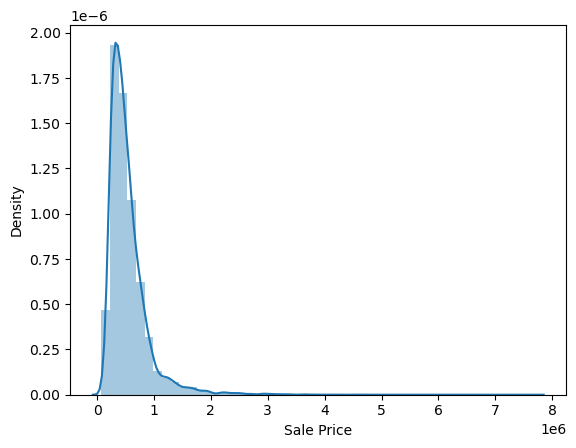

In [31]:
sns.distplot(data['Sale Price']) 
plt.show()

* We can see a lot of outliers in the Sale Price and it is __not normally distributed__

Text(0.5, 0.98, '')

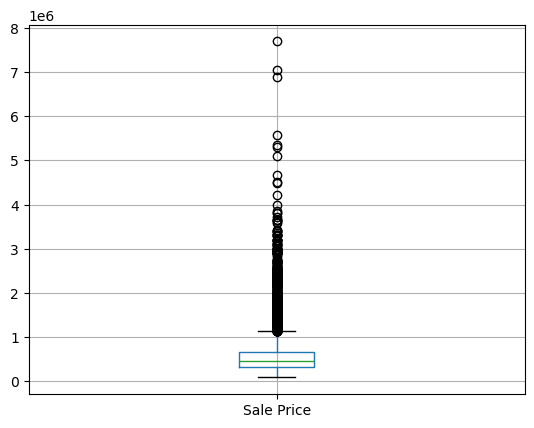

In [32]:
data.boxplot(column = 'Sale Price')
plt.suptitle("")

* We can see that there are __higher number__ of houses with very high sale price, which are appearing to be the __outliers__.

#### Treating the Outliers by Imputing method

In [33]:
# checking quantiles
q1 = data['Sale Price'].quantile(0.25)   # first quartile, q1
q3 = data['Sale Price'].quantile(0.75)   # third quartile, q3
q1, q3

(321950.0, 645000.0)

In [34]:
#calculating iqr
iqr = q3 - q1   # inter-quartile range, iqr
iqr

323050.0

In [35]:
# Calculation upper_limit and lower_limit
upper_limit = q3 + 1.5*iqr   
lower_limit = q1 - 1.5*iqr
upper_limit, lower_limit

(1129575.0, -162625.0)

In [36]:
# imputing outliers by defing a function
def limit_imputer(value):
  if value > upper_limit:
    return upper_limit
  if value < lower_limit:
    return lower_limit
  else:
    return value

In [37]:
data['Sale Price'] = data['Sale Price'].apply(limit_imputer)

In [38]:
data['Sale Price'].describe()

count    2.160900e+04
mean     5.116186e+05
std      2.500620e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      1.129575e+06
Name: Sale Price, dtype: float64

In [39]:
data['Sale Price'].describe()

count    2.160900e+04
mean     5.116186e+05
std      2.500620e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      1.129575e+06
Name: Sale Price, dtype: float64

* Now, It can be inferred that there is __no outliers__ exist

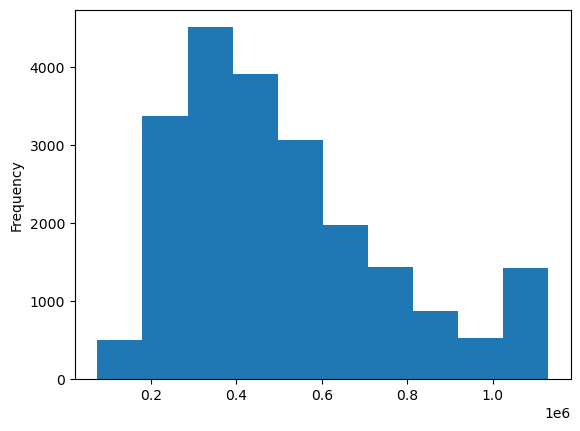

In [40]:
# Histgram graph of target varible
data['Sale Price'].plot.hist()
plt.show()

* Mojority of house's selling price ranges from __200000__ to __600000__
* The distribution is __fairly normal__.

#### Analysis of Independent Variable with Mean Sale Price

In [41]:
data.drop( columns = 'ID', inplace = True)

* House ID is __not a significant variable__ and it is not required as a feature for building model

In [42]:
## Condition of the House
data['Condition of the House'].head(10)

0         Fair
1         Fair
2         Fair
3    Excellent
4         Fair
5         Fair
6         Fair
7         Fair
8         Fair
9         Fair
Name: Condition of the House, dtype: object

In [43]:
data['Condition of the House'].value_counts()

Condition of the House
Fair         14028
Good          5678
Excellent     1701
Okay           172
Bad             30
Name: count, dtype: int64

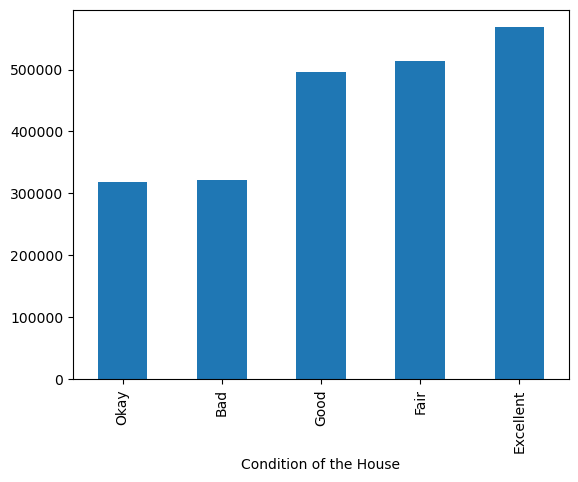

In [44]:
data.groupby('Condition of the House')['Sale Price'].mean().sort_values().plot(kind = 'bar')
plt.show()

* Bad Houses and Okay Houses are almost same in Mean Sale Price
* And Fair houses and Good houses are almost same in mean sale price
* Majority of houses in __Excellent__ condition

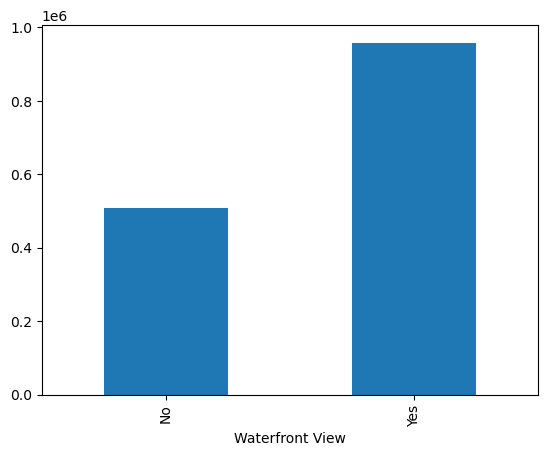

In [45]:
## Waterfront View
data.groupby('Waterfront View')['Sale Price'].mean().sort_values().plot(kind = 'bar')
plt.show()

* __Majority__ Houses in the dataset having __Waterfront View__
* And Mean Sale Price of Waterfront View houses is a little more

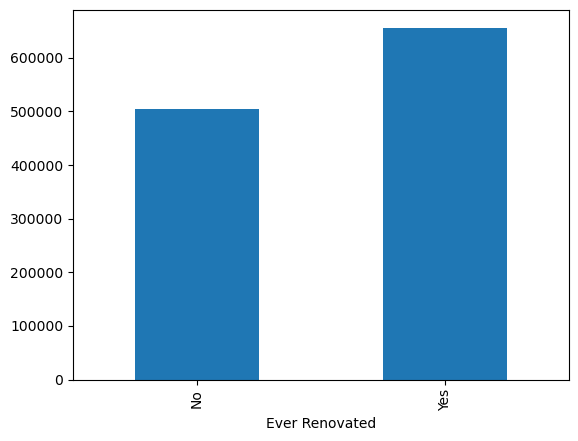

In [46]:
data.groupby('Ever Renovated')['Sale Price'].mean().sort_values().plot(kind = 'bar')
plt.show()

* The houses are __more renovated__ as compared that of Not renovated
* Also Mean Sale Price is little more

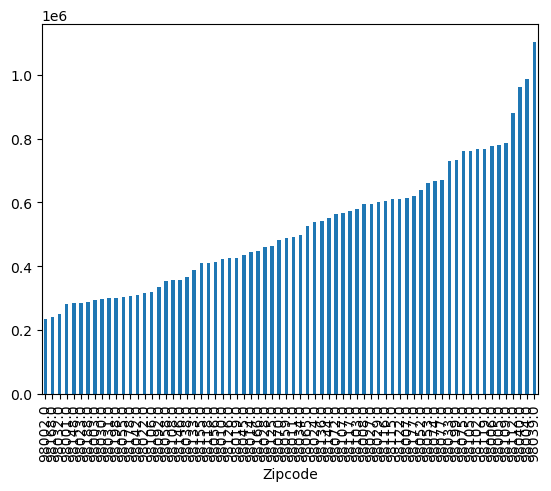

In [47]:
data.groupby('Zipcode',)['Sale Price'].mean().sort_values().plot(kind = 'bar')
plt.show()

* Here, We can see a lot of __variety__ of Mean Sale Price with Differnt Zipcode

#### Viriable Transformation

In [48]:
data.dropna(inplace=True)
X = data.drop(columns=['Sale Price'])
Y = data['Sale Price']

In [49]:
numerical_columns = ['No of Bedrooms', 'No of Bathrooms', 'Lot Area (in Sqft)',
       'No of Floors',
       'Area of the House from Basement (in Sqft)', 'Basement Area (in Sqft)',
       'Age of House (in Years)', 'Latitude', 'Longitude',
       'Living Area after Renovation (in Sqft)',
       'Lot Area after Renovation (in Sqft)',
       'Years Since Renovation']

* Creating a new variable and storing all numerical variables in it

In [50]:
def distribution(data ,var):
  plt.figure(figsize = (len(var)*6,6), dpi = 120)
  for j,i in enumerate(var):
    plt.subplot(1,len(var),j+1)
    plt.hist(data[i])
    plt.title(i)

* A function is created to checking the disribution of independent numerical varibles

In [51]:
for i in numerical_columns:
  X[i] = pd.to_numeric(X[i])

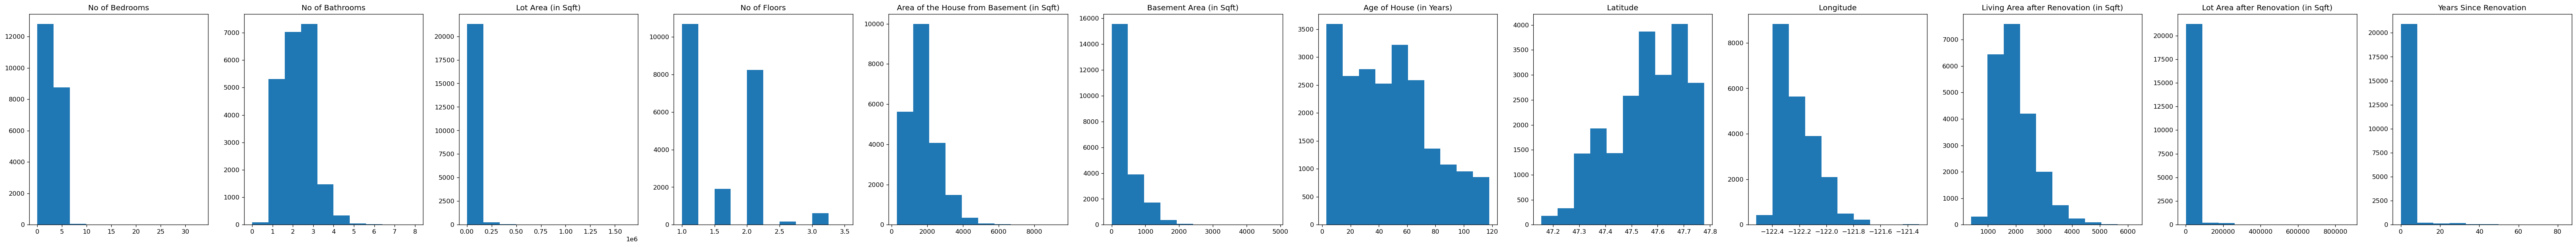

In [52]:
distribution(X, numerical_columns)

Following inferences can be made from the above hist plots:

* Only two of them are fairly normal distributed, i.e __"Age of House (in Years)" and "Latitude"__
* And all remaining plots are __right_skewed distributed__

In [53]:
#removing right skew
def right_skew(x):
  return np.log(abs(x+500))

right_skew_variables = ['No of Bedrooms', 'No of Bathrooms', 'Lot Area (in Sqft)',
       'No of Floors',
       'Area of the House from Basement (in Sqft)', 'Basement Area (in Sqft)',
        'Longitude',
       'Living Area after Renovation (in Sqft)',
       'Lot Area after Renovation (in Sqft)',
       'Years Since Renovation']


In [54]:
for i in right_skew_variables:
  X[i] = X[i].map(right_skew)

# removing infinite values
X = X.replace(np.inf, np.nan)
X.dropna(inplace=True)

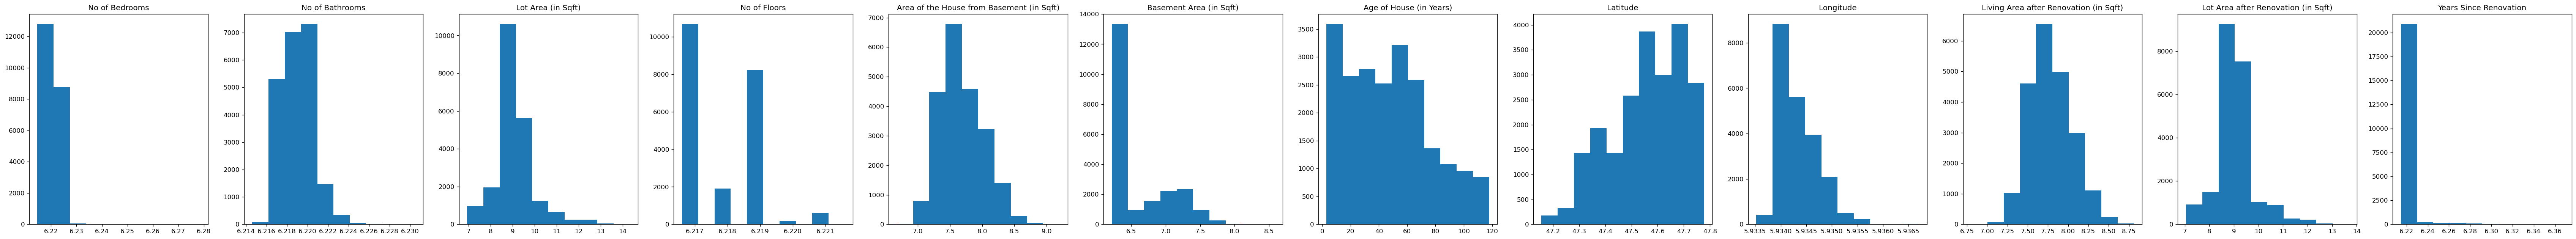

In [55]:
distribution(X, numerical_columns)

* Now, We can see clearly that all hist plots are almost fairly normal disributed

#### Scaling the Data

In [56]:
X.head()

,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,Condition of the House,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Ever Renovated,Years Since Renovation
0,6.220590,6.216606,1180.0,8.724207,6.216606,No,Fair,7,7.426549,6.214608,63,98178.0,47.5112,5.934214,7.517521,8.724207,No,6.214608
1,6.220590,6.219098,2570.0,8.954415,6.218600,No,Fair,7,7.889834,6.802395,67,98125.0,47.7210,5.934050,7.691657,9.004423,Yes,6.265301
2,6.218600,6.216606,770.0,9.259131,6.216606,No,Fair,6,7.146772,6.214608,85,98028.0,47.7379,5.934278,8.077137,9.055089,No,6.214608
3,6.222576,6.220590,1960.0,8.612503,6.216606,No,Excellent,7,7.346010,7.251345,53,98136.0,47.5208,5.933854,7.528332,8.612503,No,6.214608
4,6.220590,6.218600,1680.0,9.057189,6.216606,No,Fair,8,7.687080,6.214608,31,98074.0,47.6168,5.934775,7.740664,8.987572,No,6.214608


In [57]:
## Using map() method to convert categorical data to numerical
X["Waterfront View"] = X["Waterfront View"].map({    'No':0,
   'Yes':1
})


X['Condition of the House'] = X['Condition of the House'].map({'Bad':1,
                                                                     'Okay':2,
                                                                     'Fair':3,
                                                                     'Good':4,
                                                                     'Excellent':5
})

X['Ever Renovated'] = X['Ever Renovated'].map({
    'No':0,
    'Yes':1
})

X.head()

,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,Condition of the House,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Ever Renovated,Years Since Renovation
0,6.220590,6.216606,1180.0,8.724207,6.216606,0,3,7,7.426549,6.214608,63,98178.0,47.5112,5.934214,7.517521,8.724207,0,6.214608
1,6.220590,6.219098,2570.0,8.954415,6.218600,0,3,7,7.889834,6.802395,67,98125.0,47.7210,5.934050,7.691657,9.004423,1,6.265301
2,6.218600,6.216606,770.0,9.259131,6.216606,0,3,6,7.146772,6.214608,85,98028.0,47.7379,5.934278,8.077137,9.055089,0,6.214608
3,6.222576,6.220590,1960.0,8.612503,6.216606,0,5,7,7.346010,7.251345,53,98136.0,47.5208,5.933854,7.528332,8.612503,0,6.214608
4,6.220590,6.218600,1680.0,9.057189,6.216606,0,3,8,7.687080,6.214608,31,98074.0,47.6168,5.934775,7.740664,8.987572,0,6.214608


In [58]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Y = data['Sale Price']
X1 = scaler.fit_transform(X)
X = pd.DataFrame(data = X1, columns = X.columns)
X.head()

,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,Condition of the House,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Ever Renovated,Years Since Renovation
0,-0.398647,-1.448931,-0.979905,-0.412101,-0.915604,-0.087181,-0.629203,-0.563993,-0.767588,-0.726332,0.544734,1.870094,-0.352576,-0.306108,-1.027547,-0.416515,-0.210155,-0.168911
1,-0.398647,0.176496,0.533718,-0.139474,0.937193,-0.087181,-0.629203,-0.563993,0.642025,0.538457,0.680915,0.879534,1.161645,-0.746519,-0.355983,-0.048331,4.758385,4.827106
2,-1.477788,-1.448931,-1.426369,0.221390,-0.915604,-0.087181,-0.629203,-1.468566,-1.618851,-0.726332,1.293731,-0.933379,1.283619,-0.135646,1.130637,0.018241,-0.210155,-0.168911
3,0.678352,1.149811,-0.130534,-0.544388,-0.915604,-0.087181,2.444136,-0.563993,-1.012639,1.504500,0.204281,1.085122,-0.283288,-1.272266,-0.985854,-0.563287,-0.210155,-0.168911
4,-0.398647,-0.148266,-0.435436,-0.017762,-0.915604,-0.087181,-0.629203,0.340581,0.025117,-0.726332,-0.544715,-0.073647,0.409587,1.199268,-0.166983,-0.070472,-0.210155,-0.168911


- Now value of all data points closed to zero and that can help to improve model performance

#### Checking Correlaion and Visualise

In [59]:
X.corr()

,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,Condition of the House,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Ever Renovated,Years Since Renovation
No of Bedrooms,1.000000,0.516645,0.577469,0.175425,0.175995,-0.006617,0.028514,0.349933,0.509475,0.276781,-0.154613,-0.153163,-0.008867,0.129997,0.404806,0.154329,0.018555,-0.006734
No of Bathrooms,0.516645,1.000000,0.754415,0.105010,0.500980,0.063683,-0.124874,0.635778,0.696041,0.254042,-0.506206,-0.204097,0.024506,0.223332,0.572407,0.095798,0.050239,0.004644
Flat Area (in Sqft),0.577469,0.754415,1.000000,0.341571,0.354268,0.103841,-0.058922,0.705725,0.853690,0.373296,-0.318146,-0.199380,0.052538,0.240124,0.739515,0.318573,0.055111,0.024552
Lot Area (in Sqft),0.175425,0.105010,0.341571,1.000000,-0.218404,0.074316,0.066113,0.165808,0.319715,0.056278,-0.006100,-0.279267,-0.145945,0.376102,0.361633,0.917835,0.022789,0.033036
No of Floors,0.175995,0.500980,0.354268,-0.218404,1.000000,0.023721,-0.263676,0.461442,0.548408,-0.266598,-0.489232,-0.059289,0.049640,0.125724,0.277817,-0.210687,0.006318,-0.000379
Waterfront View,-0.006617,0.063683,0.103841,0.074316,0.023721,1.000000,0.016650,0.070332,0.063294,0.063276,0.026149,0.030286,-0.014275,-0.041934,0.080573,0.083232,0.093291,0.105822
Condition of the House,0.028514,-0.124874,-0.058922,0.066113,-0.263676,0.016650,1.000000,-0.143747,-0.153588,0.176043,0.361383,0.003076,-0.015008,-0.106546,-0.090182,0.073370,-0.060152,-0.012115
Overall Grade,0.349933,0.635778,0.705725,0.165808,0.461442,0.070332,-0.143747,1.000000,0.723789,0.116078,-0.456711,-0.185844,0.111226,0.201765,0.676795,0.167561,0.010010,-0.023473
Area of the House from Basement (in Sqft),0.509475,0.696041,0.853690,0.319715,0.548408,0.063294,-0.153588,0.723789,1.000000,-0.111289,-0.448692,-0.285278,-0.015269,0.360187,0.720753,0.301163,0.026070,0.013457
Basement Area (in Sqft),0.276781,0.254042,0.373296,0.056278,-0.266598,0.063276,0.176043,0.116078,-0.111289,1.000000,0.153930,0.103527,0.121208,-0.177197,0.166776,0.045337,0.067745,0.028257


##### Strong Positive Correlations :
- Flat Area (in Sqft) and Area of the House from Basement (0.85)
- Flat Area (in Sqft) and Living Area after Renovation (0.74)
- Overall Grade and Area of the House from Basement (0.72)
- No. of Bathrooms and Flat Area (0.75)
- Ever Renovated and Years Since Renovation (0.80)

##### Strong Negative Correlations :
- Age of House and Overall Grade (-0.45)
- Longitude and Zipcode (-0.56)
- Age of House and No. of Bathrooms (-0.50)
- Latitude and Longitude (-0.13)

In [60]:
## pair of independent variables with correlation greater than 0.5
k = X.corr()
z = [[str(i),str(j)] for i in k.columns for j in k.columns if (k.loc[i,j] >abs(0.5))&(i!=j)]
z, len(z)

([['No of Bedrooms', 'No of Bathrooms'],
  ['No of Bedrooms', 'Flat Area (in Sqft)'],
  ['No of Bedrooms', 'Area of the House from Basement (in Sqft)'],
  ['No of Bathrooms', 'No of Bedrooms'],
  ['No of Bathrooms', 'Flat Area (in Sqft)'],
  ['No of Bathrooms', 'No of Floors'],
  ['No of Bathrooms', 'Overall Grade'],
  ['No of Bathrooms', 'Area of the House from Basement (in Sqft)'],
  ['No of Bathrooms', 'Living Area after Renovation (in Sqft)'],
  ['Flat Area (in Sqft)', 'No of Bedrooms'],
  ['Flat Area (in Sqft)', 'No of Bathrooms'],
  ['Flat Area (in Sqft)', 'Overall Grade'],
  ['Flat Area (in Sqft)', 'Area of the House from Basement (in Sqft)'],
  ['Flat Area (in Sqft)', 'Living Area after Renovation (in Sqft)'],
  ['Lot Area (in Sqft)', 'Lot Area after Renovation (in Sqft)'],
  ['No of Floors', 'No of Bathrooms'],
  ['No of Floors', 'Area of the House from Basement (in Sqft)'],
  ['Overall Grade', 'No of Bathrooms'],
  ['Overall Grade', 'Flat Area (in Sqft)'],
  ['Overall Grade',

<Axes: >

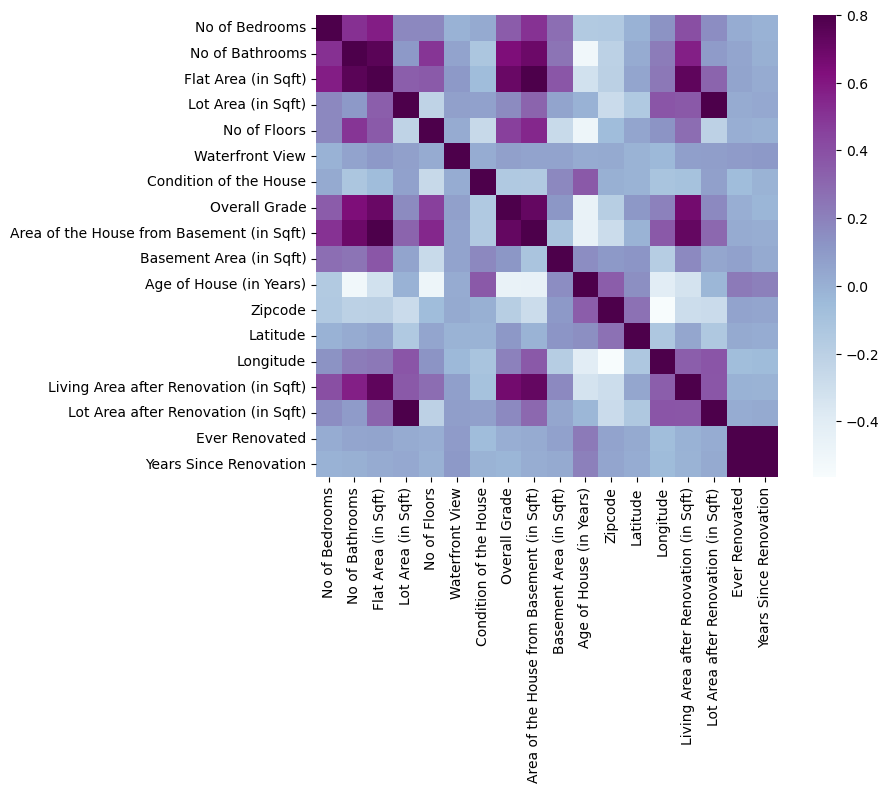

In [61]:
# heat map to visualize the correlation
matrix = X.corr()
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(matrix, vmax=.8, square=True, cmap="BuPu")

### Checking and Removing Multicollinearity   

##### Calcualting Variation Inflation Factor(VIF)

In [62]:
# Importing Variance_inflation_Factor funtion from the Statsmodels
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = X[:]

## Calculating VIF for every column
VIF = pd.Series([variance_inflation_factor(vif_data.values, i) for i in range(vif_data.shape[1])], index = vif_data.columns)
VIF

No of Bedrooms                                1.726029
No of Bathrooms                               3.422650
Flat Area (in Sqft)                          21.455813
Lot Area (in Sqft)                            6.841853
No of Floors                                  2.387300
Waterfront View                               1.043717
Condition of the House                        1.260151
Overall Grade                                 2.892590
Area of the House from Basement (in Sqft)    23.253430
Basement Area (in Sqft)                       6.552309
Age of House (in Years)                       2.444063
Zipcode                                       1.655348
Latitude                                      1.182756
Longitude                                     1.876030
Living Area after Renovation (in Sqft)        2.857392
Lot Area after Renovation (in Sqft)           6.602902
Ever Renovated                                3.022379
Years Since Renovation                        2.871700
dtype: flo

In [63]:
VIF[VIF == VIF.max()].index[0]

'Area of the House from Basement (in Sqft)'

* __Area of the House from Basement (in Sqft)__ variable having the maximum VIF

In [64]:
def MC_remover(data):
  vif = pd.Series([variance_inflation_factor(data.values, i) for i in range(data.shape[1])], index = data.columns)
  if vif.max() > 5:
    print(vif[vif == vif.max()].index[0],'has been removed')
    data = data.drop(columns = [vif[vif == vif.max()].index[0]])
    return data
  else:
    print('No Multicollinearity present anymore')
    return data

* Removing the Multicollinearity which having VIF is greater than 5

In [65]:
for i in range(7):
  vif_data = MC_remover(vif_data)

vif_data.head()

Area of the House from Basement (in Sqft) has been removed
Lot Area (in Sqft) has been removed
Flat Area (in Sqft) has been removed
No Multicollinearity present anymore
No Multicollinearity present anymore
No Multicollinearity present anymore
No Multicollinearity present anymore


,No of Bedrooms,No of Bathrooms,No of Floors,Waterfront View,Condition of the House,Overall Grade,Basement Area (in Sqft),Age of House (in Years),Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Ever Renovated,Years Since Renovation
0,-0.398647,-1.448931,-0.915604,-0.087181,-0.629203,-0.563993,-0.726332,0.544734,1.870094,-0.352576,-0.306108,-1.027547,-0.416515,-0.210155,-0.168911
1,-0.398647,0.176496,0.937193,-0.087181,-0.629203,-0.563993,0.538457,0.680915,0.879534,1.161645,-0.746519,-0.355983,-0.048331,4.758385,4.827106
2,-1.477788,-1.448931,-0.915604,-0.087181,-0.629203,-1.468566,-0.726332,1.293731,-0.933379,1.283619,-0.135646,1.130637,0.018241,-0.210155,-0.168911
3,0.678352,1.149811,-0.915604,-0.087181,2.444136,-0.563993,1.504500,0.204281,1.085122,-0.283288,-1.272266,-0.985854,-0.563287,-0.210155,-0.168911
4,-0.398647,-0.148266,-0.915604,-0.087181,-0.629203,0.340581,-0.726332,-0.544715,-0.073647,0.409587,1.199268,-0.166983,-0.070472,-0.210155,-0.168911


In [66]:
# Calculating VIF for remaining columns
VIF = pd.Series([variance_inflation_factor(vif_data.values, i) for i in range(vif_data.shape[1])], index = vif_data.columns)
VIF, len(vif_data.columns)

(No of Bedrooms                            1.487445
 No of Bathrooms                           2.946117
 No of Floors                              2.184025
 Waterfront View                           1.039670
 Condition of the House                    1.253562
 Overall Grade                             2.526821
 Basement Area (in Sqft)                   1.601065
 Age of House (in Years)                   2.375189
 Zipcode                                   1.652067
 Latitude                                  1.174666
 Longitude                                 1.854070
 Living Area after Renovation (in Sqft)    2.438236
 Lot Area after Renovation (in Sqft)       1.550612
 Ever Renovated                            3.017322
 Years Since Renovation                    2.868099
 dtype: float64,
 15)

* Now, we can see clearly anyone has no VIF more than 5

In [75]:
X.to_csv("data/processed_data/X.csv", index = False)
Y.to_csv("data/processed_data/Y.csv", index = False)
print("X and Y saved successfully")

X and Y saved successfully


In [76]:
## Recombining X and Y data 
x_loaded = pd.read_csv("data/processed_data/X.csv")
y_loaded = pd.read_csv("data/processed_data/Y.csv")
data_recombined = pd.concat([x_loaded, y_loaded], axis = 1)
data_recombined.head()

,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,Condition of the House,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Ever Renovated,Years Since Renovation,Sale Price
0,-0.398647,-1.448931,-0.979905,-0.412101,-0.915604,-0.087181,-0.629203,-0.563993,-0.767588,-0.726332,0.544734,1.870094,-0.352576,-0.306108,-1.027547,-0.416515,-0.210155,-0.168911,221900.0
1,-0.398647,0.176496,0.533718,-0.139474,0.937193,-0.087181,-0.629203,-0.563993,0.642025,0.538457,0.680915,0.879534,1.161645,-0.746519,-0.355983,-0.048331,4.758385,4.827106,538000.0
2,-1.477788,-1.448931,-1.426369,0.221390,-0.915604,-0.087181,-0.629203,-1.468566,-1.618851,-0.726332,1.293731,-0.933379,1.283619,-0.135646,1.130637,0.018241,-0.210155,-0.168911,180000.0
3,0.678352,1.149811,-0.130534,-0.544388,-0.915604,-0.087181,2.444136,-0.563993,-1.012639,1.504500,0.204281,1.085122,-0.283288,-1.272266,-0.985854,-0.563287,-0.210155,-0.168911,604000.0
4,-0.398647,-0.148266,-0.435436,-0.017762,-0.915604,-0.087181,-0.629203,0.340581,0.025117,-0.726332,-0.544715,-0.073647,0.409587,1.199268,-0.166983,-0.070472,-0.210155,-0.168911,510000.0


In [77]:
data.to_csv("data/processed_data/data_recombined.csv", index = False)